In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb

In [28]:
from pandas_datareader import data as pdr
import yfinance as yf

data = yf.download('SPY', start = '2012-01-01', end='2017-01-01')

[*********************100%***********************]  1 of 1 downloaded


In [30]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,127.76,128.38,127.43,127.50,109.21,193697900
2012-01-04,127.20,127.81,126.71,127.70,109.38,127186500
2012-01-05,127.01,128.23,126.43,128.04,109.67,173895000
2012-01-06,128.20,128.22,127.29,127.71,109.39,148050000
2012-01-09,128.00,128.18,127.41,128.02,109.65,99530200


In [31]:
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
data.reindex(columns=cols)

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2012-01-03,NaN,127.76,128.38,127.43,127.50,193697900,109.21
2012-01-04,NaN,127.20,127.81,126.71,127.70,127186500,109.38
2012-01-05,NaN,127.01,128.23,126.43,128.04,173895000,109.67
2012-01-06,NaN,128.20,128.22,127.29,127.71,148050000,109.39
2012-01-09,NaN,128.00,128.18,127.41,128.02,99530200,109.65
...,...,...,...,...,...,...,...
2016-12-23,NaN,225.43,225.72,225.21,225.71,36697800,214.29
2016-12-27,NaN,226.02,226.73,226.00,226.27,42672500,214.82
2016-12-28,NaN,226.57,226.59,224.27,224.40,64095000,213.05


In [42]:
#import pandas_datareader.data as web
#import datetime as dt    

#start = dt.datetime(2018,1,1)
#end = dt.datetime(2019,1,1)

#aapl = web.DataReader('AAPL', 'iex', start, end)

#aapl.shape

In [32]:
#AAPL_IEX = wb.DataReader('AAPL', data_source='iex', start='2015-1-1')

In [33]:
#AAPL_IEX.head()

In [34]:
#GOOGL_IEX = wb.DataReader('GOOGL', data_source='iex', start='2015-1-1')

In [ ]:
#GOOGL_IEX.head()

In [35]:
#AAPL = wb.DataReader('AAPL', data_source='morningstar', start='2015-1-1')

In [36]:
#AAPL.head()

In [37]:
#GOOGL = wb.DataReader('GOOGL', data_source='morningstar', start='2015-1-1')

In [38]:
#GOOGL.head()

### Security risks and returns

#### Calculating Rate of Return of a Security using Simple Returns:

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data = 'C:/Users/Nick/Desktop/Desktop/Lab/Packt Book/9781789346374-HANDSON_PYTHON_FOR_FINANCE/Hands-on-Python-for-Finance-master/Chapter 4/MSFT_stock.csv'
MSFT = pd.read_csv(data, index_col = 'Date')

In [45]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,58.75000,58.8750,58.1250,58.37500,38.771053,12517600
2000-01-03,58.68750,59.3125,56.0000,58.28125,38.708794,53228400
2000-01-04,56.78125,58.5625,56.1250,56.31250,37.401215,54119000
2000-01-05,55.56250,58.1875,54.6875,56.90625,37.795563,64059600
2000-01-06,56.09375,56.9375,54.1875,55.00000,36.529484,54976600


In [46]:
MSFT.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-06,81.550003,83.139999,81.430000,82.779999,82.779999,26162100
2017-12-07,82.540001,82.800003,82.000000,82.489998,82.489998,23184500
2017-12-08,83.629997,84.580002,83.330002,84.160004,84.160004,24489100
2017-12-11,84.290001,85.370003,84.120003,85.230003,85.230003,20121700
2017-12-12,85.309998,86.050003,85.080002,85.529999,85.529999,7805031


In [47]:
MSFT['simple_return'] = (MSFT['Close'] / MSFT['Close'].shift(1)) - 1
print (MSFT['simple_return'].head(10))

Date
1999-12-31         NaN
2000-01-03   -0.001606
2000-01-04   -0.033780
2000-01-05    0.010544
2000-01-06   -0.033498
2000-01-07    0.013068
2000-01-10    0.007291
2000-01-11   -0.025612
2000-01-12   -0.032571
2000-01-13    0.018901
Name: simple_return, dtype: float64


In [48]:
MSFT.index=pd.to_datetime(MSFT.index)

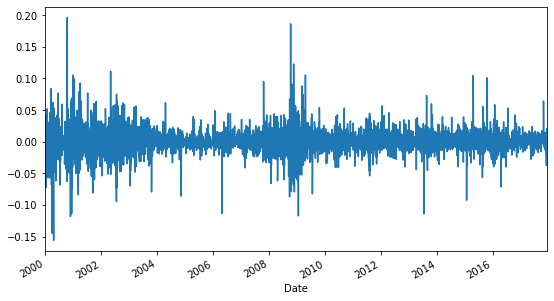

In [49]:
MSFT['simple_return'].plot(figsize=(9,5))
plt.show()

In [50]:
MSFT_average_return=MSFT['simple_return'].mean()
round(MSFT_average_return, 6)

0.000273

In [51]:
MSFT_average_return=MSFT['simple_return'].mean()*250
MSFT_average_return

0.06820496450977334

In [52]:
print(str(MSFT_average_return * 100)+ '%')

6.820496450977334%


#### Calculating Rate of Return of a Security using Logarithmic Returns:

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
MSFT = pd.read_csv(data, index_col = 'Date')

In [19]:
MSFT['log_return'] = np.log(MSFT['Close'] / MSFT['Close'].shift(1))
print (MSFT['log_return'])

Date
1999-12-31         NaN
2000-01-03   -0.001607
2000-01-04   -0.034364
2000-01-05    0.010489
2000-01-06   -0.034072
                ...   
2017-12-06    0.014480
2017-12-07   -0.003509
2017-12-08    0.020043
2017-12-11    0.012634
2017-12-12    0.003514
Name: log_return, Length: 4517, dtype: float64


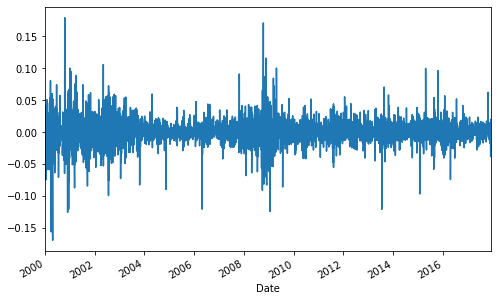

In [20]:
MSFT.index=pd.to_datetime(MSFT.index)
MSFT['log_return'].plot(figsize=(8, 5))
plt.show()

In [21]:
log_return_d = MSFT['log_return'].mean()
log_return_d

8.45835836828664e-05

In [22]:
log_return_a = MSFT['log_return'].mean() * 250
log_return_a

0.0211458959207166

#### Calaculating the risk of a Security

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
security_data = pd.read_csv('MSFT_AAPL_stock.csv', index_col = 'Date')

In [58]:
security_data.index = pd.to_datetime(security_data.index)

In [59]:
security_data.head()

,MSFT,AAPL
Date,,
1999-12-31,38.965767,3.303425
2000-01-03,38.903194,3.596616
2000-01-04,37.589046,3.293384
2000-01-05,37.985374,3.341579
2000-01-06,36.712940,3.052405


In [60]:
security_returns = np.log(security_data / security_data.shift(1))

In [61]:
security_returns.head(20)

,MSFT,AAPL
Date,,
1999-12-31,NaN,NaN
2000-01-03,-0.001607,0.085034
2000-01-04,-0.034364,-0.088078
2000-01-05,0.010489,0.014528
2000-01-06,-0.034072,-0.090514
2000-01-07,0.012983,0.046281
2000-01-10,0.007264,-0.017745
2000-01-11,-0.025946,-0.052505
2000-01-12,-0.033114,-0.061847


In [62]:
security_returns['MSFT'].mean()

0.00011508712580239439

In [63]:
security_returns['MSFT'].mean()*250

0.028771781450598596

In [69]:
security_returns['MSFT'].std()

0.019656948849403607

In [70]:
security_returns['MSFT'].std()*250**0.5

0.31080365106770774

In [65]:
security_returns['AAPL'].mean()

0.000864342049190355

In [66]:
security_returns['AAPL'].mean()*250

0.21608551229758874

In [68]:
security_returns['MSFT'].std()

0.019656948849403607

In [67]:
security_returns['AAPL'].std()*250**0.5

0.4389547233905951

In [71]:
print(security_returns['MSFT'].mean()*250)
print(security_returns['AAPL'].mean()*250)

0.028771781450598596
0.21608551229758874


In [72]:
security_returns.head(5)

,MSFT,AAPL
Date,,
1999-12-31,NaN,NaN
2000-01-03,-0.001607,0.085034
2000-01-04,-0.034364,-0.088078
2000-01-05,0.010489,0.014528
2000-01-06,-0.034072,-0.090514


In [73]:
security_returns[['MSFT', 'AAPL']].mean()*250

MSFT    0.028772
AAPL    0.216086
dtype: float64

In [75]:
security_returns[['MSFT', 'AAPL']].mean()*250**0.5

MSFT    0.001820
AAPL    0.013666
dtype: float64

#### Portfolio Diversification